<div align=center>
<p></p>
 <br/>
    <br/>
<font color=#FF7500 size=5>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue size=5>
Linear Algebra
</font>
<br/>
<br/>
Spring 2023

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Final project - Q1
			</font>
    <br/>
<font size=4>
			<br/><br/>

<b>

<b/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>

## Q1: Spectral Clustering (100 Points)

## Introduction
Spectral clustering is a clustering technique that uses the spectrum of the similarity matrix to perform dimensionality reduction before clustering in fewer dimensions. It is a powerful technique that can identify clusters of arbitrary shape and is robust to noise. It is also a popular technique for image segmentation. In this notebook, we will implement spectral clustering from scratch and apply it to graphs and kNN circles.

## Graph Implementation
In this section, we will implement a graph class that will be used to represent the similarity matrix. The graph class will have the following attributes and methods:
* **N**: the number of nodes in the graph
* **nodes**: the set of nodes in the graph
* **vertices**: the dict of edges of each node
* **add_node**: Add a node to the graph
* **connect**: Connect two nodes with an edge
* **disconnect**: Disconnect two nodes

In [1]:
class Graph:
    def __init__(self) -> None:
        self.N: int = 0
        self.nodes: set[int] = set()
        self.vertices: dict[int, set[int]] = dict()

    def add_node(self):
        self.nodes.add(self.N)
        self.vertices[self.N] = set()
        self.N += 1

    def connect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        self.vertices[B].add(A)
        self.vertices[A].add(B)

    def disconnect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        assert A in self.vertices[B]
        assert B in self.vertices[A]
        self.vertices[B].remove(A)
        self.vertices[A].remove(B)

## Constructing the Similarity Matrix
First we need to construct adjacency matrix.
Adjacency matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $A_{ij} = 1$ if there is an edge connecting node $i$ and node $j$. If there is no edge connecting node $i$ and node $j$, then $A_{ij} = 0$.

In [2]:
import numpy as np

def adjacency_matrix(graph: Graph) -> np.ndarray:
    adjacency = np.zeros((graph.N, graph.N), dtype=int)
    for node in graph.nodes:
        node_neighbours = graph.vertices[node]
        for neighbour in node_neighbours:
            adjacency[node, neighbour] = 1
            adjacency[neighbour, node] = 1
    return adjacency

Then we need to construct the degree matrix.
Degree matrix is a diagonal matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $D_{ii}$ is the degree of node $i$, i.e. the number of edges connected to node $i$. All other entries are 0.

In [3]:
def degree_matrix(graph: Graph) -> np.ndarray:
    degree = np.zeros((graph.N, graph.N), dtype=int)
    for i in graph.nodes:
        degree[i, i] = len(graph.vertices[i])

    return degree

Finally, we can construct the laplacian matrix.
Laplacian matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. There are many ways to define the laplacian between two nodes. In this notebook, we will use normal Laplacian similarity matrix, which is defined as:
\begin{equation}
S_{ij} = D_{ij} - A_{ij}
\end{equation}
where $D_{ij}$ is the degree matrix and $A_{ij}$ is the adjacency matrix.

In [4]:
def laplacian_matrix(graph: Graph) -> np.ndarray:
    return degree_matrix(graph) - adjacency_matrix(graph)

## Calculating Eigenvectors and Eigenvalues
After constructing the similarity matrix, we can calculate the eigenvectors and eigenvalues of the similarity matrix. We can then use the eigenvectors to perform dimensionality reduction. In this notebook, we will use the eigenvectors corresponding to the $k$ smallest eigenvalues, where $k$ is the number of clusters.

* Eigenvalues of laplacian matrix are always non-negative. Laplacian matrix is a positive semi-definite matrix.
* The first eigenvalue is always 0, and the corresponding eigenvector is the vector of all ones since the sum of each row of the laplacian matrix is 0.
* The second smallest eigenvalue is called the Fielder value (Algebraic connectivity). It is a measure of how well connected the graph is after removing the most poorly connected node. The Fielder value is often used to approximate sparsest cut of the graph. If the graph is connected, then the Fielder value is positive. If the graph is disconnected, then the Fielder value is 0. The number of times 0 appears as an eigenvalue is equal to the number of connected components in the graph.

In [5]:
def laplacian_values(graph: Graph, K: int) -> tuple[np.ndarray, np.ndarray]:
    assert K > 0
    assert K < graph.N
    
    L = laplacian_matrix(graph)
    
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    nonzero_indices = np.where(sorted_eigenvalues > 1e-10)[0]
    selected_eigenvalues = sorted_eigenvalues[nonzero_indices[:K]]
    selected_eigenvectors = sorted_eigenvectors[:, nonzero_indices[:K]]
    
    return selected_eigenvalues, selected_eigenvectors

## Plotting Eigenvalues

After becoming familiar with laplacian matrix, we can plot the eigenvalues of the laplacian matrix. The eigenvalues are plotted in ascending order. The x-axis is the index of the eigenvalue, and the y-axis is the value of the eigenvalue. The eigenvalues are plotted as a scatter plot.

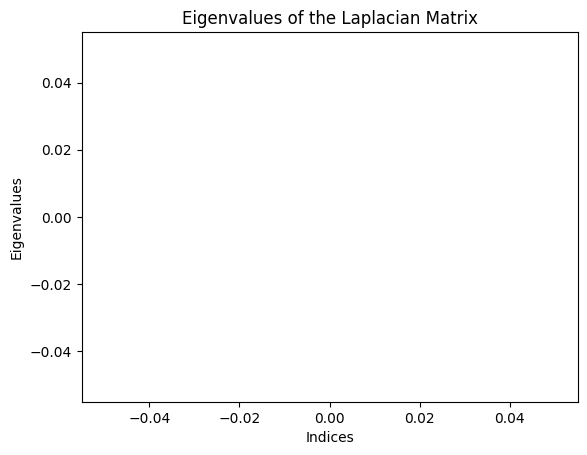

In [6]:
import matplotlib.pyplot as plt

g = Graph()
g.add_node()
g.add_node()
g.add_node()
g.add_node()

eigen_values = laplacian_values(g, g.N - 1)[0]
plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

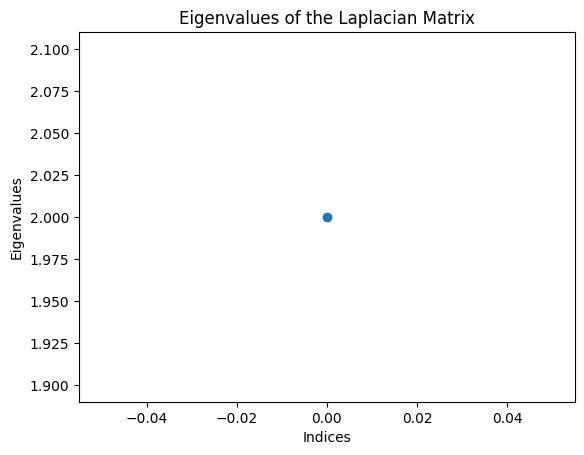

In [7]:
g.connect(0, 1)
eigen_values = laplacian_values(g, g.N - 1)[0]

plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

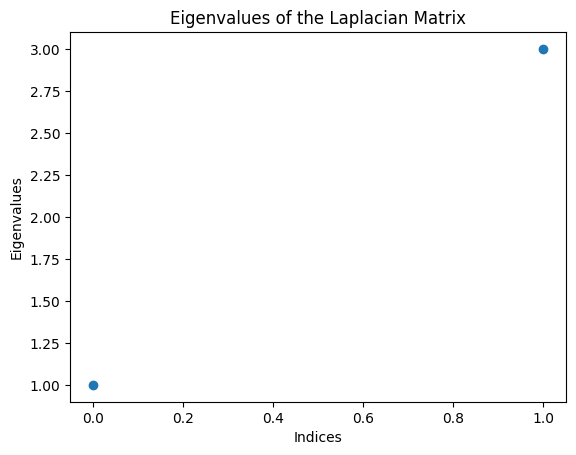

In [8]:
g.connect(1, 2)
eigen_values = laplacian_values(g, g.N - 1)[0]

plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

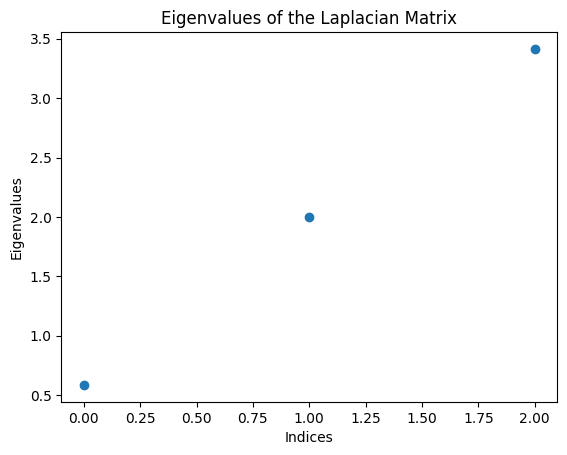

In [9]:
g.connect(2, 3)
eigen_values = laplacian_values(g, g.N - 1)[0]

plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

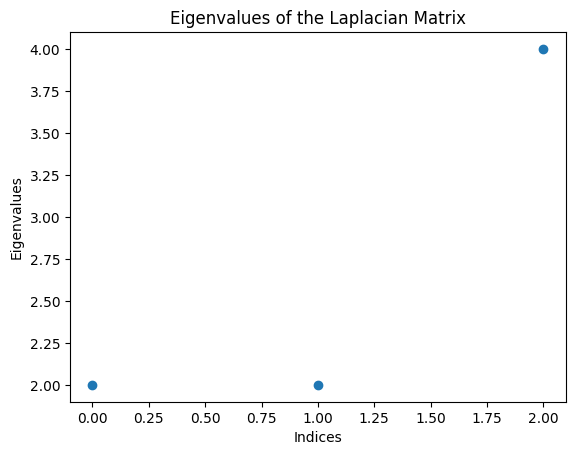

In [10]:
g.connect(3, 0)
eigen_values = laplacian_values(g, g.N - 1)[0]

plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

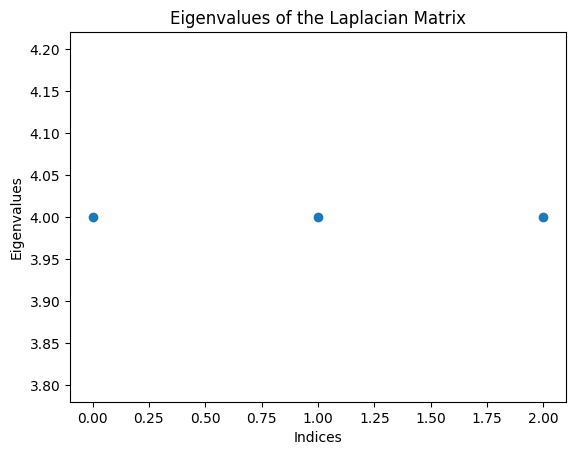

In [11]:
g.connect(0, 2)
g.connect(1, 3)
eigen_values = laplacian_values(g, g.N - 1)[0]

plt.scatter(range(len(eigen_values)), eigen_values)
plt.title('Eigenvalues of the Laplacian Matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Indices')
plt.show()

**Explain the meaning of the eigenvalues and describe the change in the eigenvalues as the edges were added to the graph here**:



**Meaning of Eigenvalues in the Laplacian Matrix:**
The eigenvalues of the Laplacian matrix provide key insights into the structure and connectivity of the graph:

- **The first eigenvalue is always zero:**

    The Laplacian matrix of any graph always has an eigenvalue of 0, corresponding to the eigenvector of all ones. This is because the sum of each row in the Laplacian matrix is zero (a property of Laplacians).
    The number of times zero appears as an eigenvalue is equal to the number of connected components in the graph. If there is exactly one zero eigenvalue, the graph is fully connected. Multiple zero eigenvalues indicate disconnected components.
- **The second smallest eigenvalue is the Fiedler value (Algebraic connectivity):**

    This eigenvalue tells us how "well-connected" the graph is. If the second smallest eigenvalue is positive, the graph is connected; if it is zero, the graph has multiple disconnected components.
    The magnitude of this value also provides information on how easy or difficult it would be to disconnect the graph by removing edges (i.e., a lower value means the graph is more easily disconnected).
- **The remaining eigenvalues:**

    Higher eigenvalues give more detailed information about the internal structure of the graph. They describe properties such as how tightly nodes are connected within the graph and the presence of "clusters" or "communities" in the network.
    
**Effect of Adding Edges on Eigenvalues:**
When edges are added to the graph, two main changes occur in the eigenvalues:

- **Decreasing the second eigenvalue:**

    Adding edges generally increases the connectivity of the graph, making the graph more robust and harder to disconnect.
    When edges are added between nodes that previously had weak or no connections, the second eigenvalue (Fiedler value) tends to increase. A higher Fiedler value indicates better connectivity, meaning the graph becomes harder to separate into distinct components.
- **Higher eigenvalues spread out:**

    As edges are added, the higher eigenvalues also tend to spread out, reflecting the increased complexity of the graph. The eigenvalue distribution becomes broader, indicating more intricate relationships and connections between the nodes.

## Clustering Eigenvectors

Next we use KMeans to cluster the data points in the lower dimensional space. We can then assign each data point to the cluster with the nearest centroid. Finally, we can plot the data points and color them according to their cluster assignments. We can also plot the eigenvectors corresponding to the $k$ smallest eigenvalues. The eigenvectors can be viewed as the coordinates of the data points in the lower dimensional space. We can see that the eigenvectors corresponding to the $k$ smallest eigenvalues can separate the data points into $k$ clusters.

In [12]:
from sklearn.cluster import KMeans

def cluster(graph: Graph, N: int):
    assert N <= graph.N
    _, vecs = laplacian_values(graph,graph.N-1)
    
    clusterer = KMeans(N)
    clusterer.fit(vecs)
    
    graph.clustered_nodes = dict([i, set()] for i in range(N))
    for N, label in enumerate(clusterer.labels_):
        graph.clustered_nodes[label].add(N)

In [13]:
import matplotlib.colors as mcolors
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

def plot(graph: Graph):
    g = graphviz.Graph()
    for cluster, color in zip(graph.clustered_nodes.keys(), mcolors.CSS4_COLORS.values()):
        with g.subgraph(name=f'C{cluster}') as gcl:
            for node in graph.clustered_nodes[cluster]:
                gcl.node(f'N{node}', style='filled', fillcolor=color)
    for A in graph.nodes:
        for B in graph.vertices[A]:
            if B > A:
                g.edge(f'N{A}', f'N{B}')
    g.view()

In [14]:
g = Graph()
g.add_node()
g.add_node()
g.connect(0, 1)
g.add_node()
g.connect(0, 2)
g.connect(1, 2)
g.add_node()
g.add_node()
g.connect(3, 4)
g.add_node()
g.connect(3, 5)
g.connect(4, 5)
g.add_node()
g.connect(5, 6)
g.add_node()
g.connect(5, 7)
g.connect(6, 7)
g.add_node()
g.connect(0, 8)
g.add_node()
g.connect(0, 9)
g.connect(8, 9)
g.connect(0, 5)
cluster(g, 3)
plot(g)

c:\Users\Msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Cluster Circles

First we make the circles. We can use the make_circles function in sklearn.datasets to make two circles. We can then plot the circles. We can see that the circles are not linearly separable.

C:\Users\Msi\AppData\Local\Temp\ipykernel_9148\1785629982.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors='k')


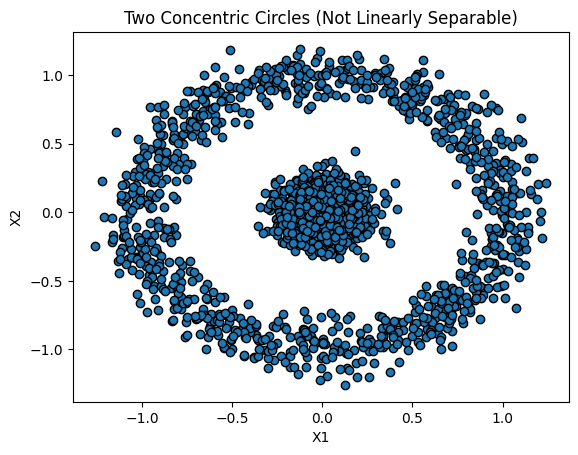

In [15]:
from sklearn.datasets import make_circles

X, labels = make_circles(n_samples=2000, noise=.1, factor=.1)
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors='k')
plt.title("Two Concentric Circles (Not Linearly Separable)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Now we construct adjacency matrix using kNN. We use kneighbors_graph function in sklearn.neighbors to construct the adjacency matrix. We can then construct the degree matrix and the laplacian matrix. We can then calculate the eigenvectors and eigenvalues of the laplacian matrix.

In [16]:
from sklearn.neighbors import kneighbors_graph

adjacency_matrix = kneighbors_graph(X, n_neighbors=5).toarray()

degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
laplacian_matrix = degree_matrix - adjacency_matrix

eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

fiedler_vector = sorted_eigenvectors[:, 1]
clusters = fiedler_vector > 0


Now let's cluster them using the Fielder value. We can see that the circles are separated into two clusters.

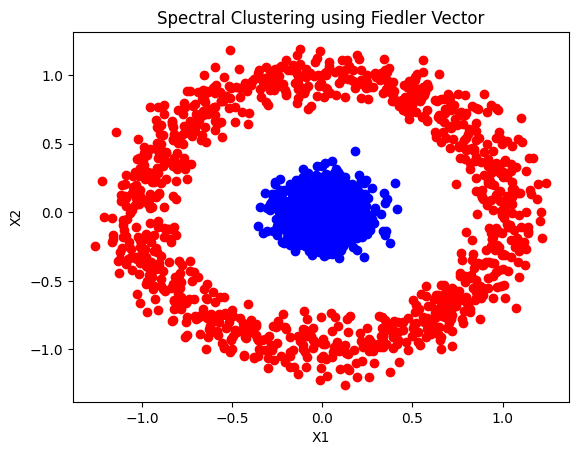

In [17]:
plt.scatter(X[clusters, 0], X[clusters, 1], color='blue', label='Cluster 1')
plt.scatter(X[~clusters, 0], X[~clusters, 1], color='red', label='Cluster 2')
plt.title('Spectral Clustering using Fiedler Vector')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()